In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [3]:
file_path = '../raw/specific_humidity/sph_2012.nc'
dataset = nc.Dataset(file_path)
print(dataset)
dataset.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.6
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.066666666666666
    geospatial_lat_max: 49.40000000000000
    geospatial_lon_min: -124.7666666333333
    geospatial_lon_max: -67.058333300000015
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 04 July 2019
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Development o

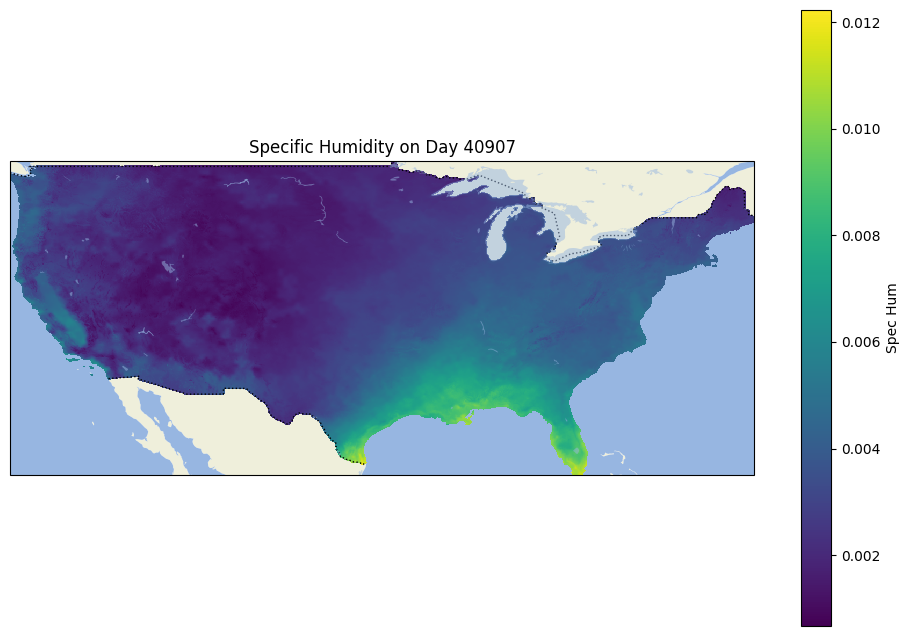

In [4]:
file_path = '../raw/specific_humidity/sph_2012.nc'
dataset = nc.Dataset(file_path)
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]
days = dataset.variables['day'][:]

day_index = 0
wind_data_day = dataset.variables['specific_humidity'][day_index, :, :]  # (lat, lon)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min(lon), max(lon), min(lat), max(lat)], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)

mesh = ax.pcolormesh(lon, lat, wind_data_day, cmap='viridis', shading='auto', transform=ccrs.PlateCarree())
plt.colorbar(mesh, ax=ax, label='Spec Hum')

plt.title(f'Specific Humidity on Day {int(days[day_index])}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

dataset.close()

In [ ]:

dataset.variables['specific_humidity'][0, (np.abs(lat - target_lat)).argmin(), (np.abs(lon - target_lon)).argmin()]